In [1]:
import json
import torch
import torchvision
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
from Tests.helper_functions import tokenize
import sys
import os
import torch.nn as nn

sys.path.append('../Python/Tests')

from CNN_small_architecture import CNNSmall

# Setting up the pytorch model

In [2]:
# Setting up the original network
model_original = CNNSmall()
model_original.eval()
# Setting the path to load the model
path = "CNN_small"
load = True
# Loading the model orginal model
if load and os.path.isfile(path):
    model_original.load_state_dict(torch.load(path))

# Testing conv1

Giving conv1 weights from SME to PyTorch model

In [3]:
model_original.conv1.bias

Parameter containing:
tensor([ 0.0895, -0.1399,  0.3267], requires_grad=True)

In [4]:
%cd ../../sme/CNNSmall/Configs
conv1_weights = open('conv1.json')
conv1_weights = json.load(conv1_weights)
model_original.conv1.weight = nn.Parameter(torch.tensor(conv1_weights["weights"]).reshape((3,1,3,3)))
model_original.conv1.bias = nn.Parameter(torch.tensor(conv1_weights["biases"]))

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Configs


Getting the sample used for the SME model

In [5]:
%cd ../Tests/conv1/inputs
sample_0 = open('input1.json')
sample_0 = json.load(sample_0)
sample_0 = torch.tensor(sample_0['buffer']).reshape(1,28,28)

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Tests\conv1\inputs


Getting prediction from PyTorch model

In [6]:
pred_pytorch_conv1 = model_original.conv1(sample_0)

Getting predictions from SME model

In [7]:
%cd ../../../Tests/Network/outputs/test0

sme_conv1 = open('conv1.json')
sme_conv1 = json.load(sme_conv1)

# Restructering for comparison
pred_sme_conv1 = torch.zeros((3,26,26))
j = -1

for i in range(len(sme_conv1['Pred']) - 1):
    if (i % (26 * 3) == 0):
        j += 1
    pred_sme_conv1[i % 3, j , i % 26] = sme_conv1['Pred'][i]

c:\Users\sture\Documents\Studie\Bachelor\bachelorprojekt\sme\CNNSmall\Tests\Network\outputs\test0


Plotting error

In [8]:
error = torch.abs(pred_sme_conv1 - pred_pytorch_conv1)

In [9]:
import matplotlib.pyplot as plt

In [10]:
error = error.detach()

[]

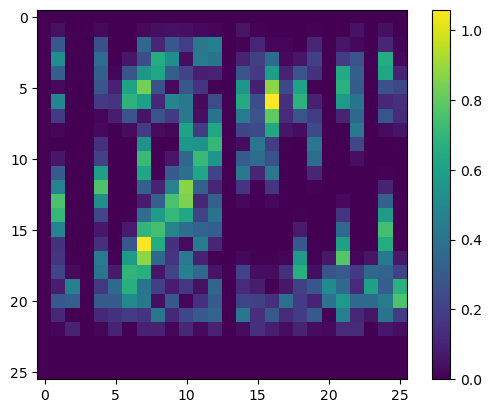

In [16]:
plt.imshow(error[0],vmin = error[0].min(),vmax = error[0].max())
plt.colorbar()
plt.plot()

[]

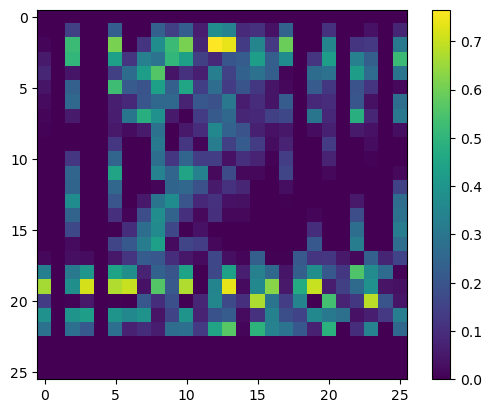

In [17]:
plt.imshow(error[1],vmin = error[1].min(),vmax = error[1].max())
plt.colorbar()
plt.plot()

[]

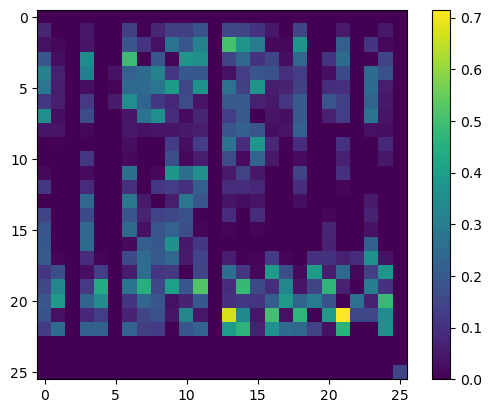

In [18]:
plt.imshow(error[2],vmin = error[2].min(),vmax = error[2].max())
plt.colorbar()
plt.plot()